#Pre-processing data

##Load Dataset

In [1]:
!gdown "16h_mWdWCsAQeO2cu_AccT1d1pW9WP60t"

Downloading...
From: https://drive.google.com/uc?id=16h_mWdWCsAQeO2cu_AccT1d1pW9WP60t
To: /content/data_ws.zip
100% 21.8M/21.8M [00:00<00:00, 78.7MB/s]


In [2]:
!unzip data_ws.zip

Archive:  data_ws.zip
   creating: data_ws/
  inflating: data_ws/ws_0.jpg        
  inflating: data_ws/ws_1.jpg        
  inflating: data_ws/ws_10.jpg       
  inflating: data_ws/ws_100.jpg      
  inflating: data_ws/ws_1000.jpg     
  inflating: data_ws/ws_1001.jpg     
  inflating: data_ws/ws_1002.jpg     
  inflating: data_ws/ws_1003.jpg     
  inflating: data_ws/ws_1004.jpg     
  inflating: data_ws/ws_1005.jpg     
  inflating: data_ws/ws_1006.jpg     
  inflating: data_ws/ws_1007.jpg     
  inflating: data_ws/ws_1008.jpg     
  inflating: data_ws/ws_1009.jpg     
  inflating: data_ws/ws_101.jpg      
  inflating: data_ws/ws_1010.jpg     
  inflating: data_ws/ws_1011.jpg     
  inflating: data_ws/ws_1012.jpg     
  inflating: data_ws/ws_1013.jpg     
  inflating: data_ws/ws_1014.jpg     
  inflating: data_ws/ws_1015.jpg     
  inflating: data_ws/ws_1016.jpg     
  inflating: data_ws/ws_1017.jpg     
  inflating: data_ws/ws_1018.jpg     
  inflating: data_ws/ws_1019.jpg     
  infl

(240, 426, 3)


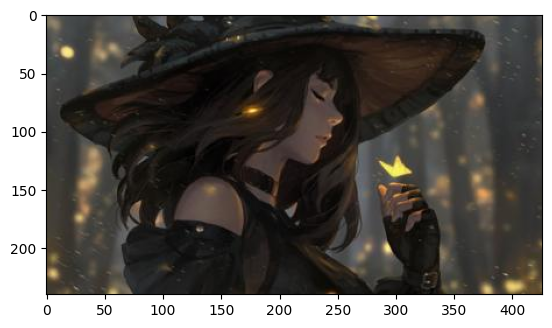

In [3]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('data_ws/ws_0.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
print(img.shape)

#Splitting dataset to train, test and val

In [4]:
import os
import random
import pandas as pd

# Path to your image folder
data_ws_dir = "/content/data_ws/"

# Get all image file paths
all_images = [os.path.join(data_ws_dir, filename) for filename in os.listdir(data_ws_dir)]

# Shuffle the paths randomly
random.shuffle(all_images)

# Split paths
train_data_ws = all_images[:967]
remaining_data_ws = all_images[967:]
test_data_ws = remaining_data_ws[:len(remaining_data_ws)//2]
val_data_ws = remaining_data_ws[len(remaining_data_ws)//2:]

print(f"Images have been randomly distributed: {len(train_data_ws)} to train, {len(test_data_ws)} to test, and {len(val_data_ws)} to val subfolders.")

Images have been randomly distributed: 967 to train, 121 to test, and 121 to val subfolders.


In [5]:
# Write to CSV files
train_df = pd.DataFrame({"image_path": train_data_ws})
test_df = pd.DataFrame({"image_path": test_data_ws})
val_df = pd.DataFrame({"image_path": val_data_ws})

train_df.to_csv("train.csv", index=False) # train_img.csv
test_df.to_csv("test.csv", index=False) # test_img.csv
val_df.to_csv("val.csv", index=False) #val_img.csv

In [6]:
train_df2list = train_df['image_path'].tolist()
test_df2list = test_df['image_path'].tolist()
val_df2list = val_df['image_path'].tolist()

In [7]:
train_df2list[:5]

['/content/data_ws/ws_123.jpg',
 '/content/data_ws/ws_900.jpg',
 '/content/data_ws/ws_332.jpg',
 '/content/data_ws/ws_647.jpg',
 '/content/data_ws/ws_409.jpg']

(240, 426, 3)


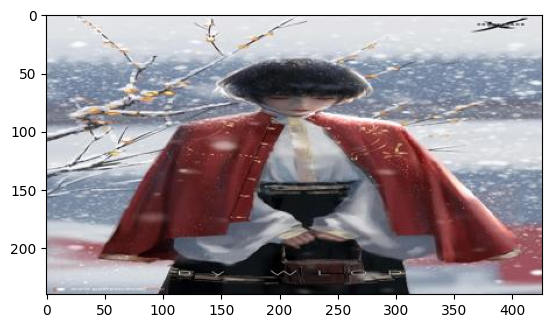

In [8]:
img = cv2.imread(train_df2list[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
print(img.shape)

##Convert Images to numpy Array

In [9]:
from PIL import Image
import numpy as np

def image2array(csv_path, image_dir):
    """
    Load images from a CSV file containing image paths.

    Args:
        csv_path (str): Path to the CSV file with image paths.
        image_folder (str): Path to the folder containing the images.

    Returns:
        list of numpy.ndarray: List of image arrays.
    """
    image_paths_df = pd.read_csv(csv_path)
    image_paths = image_paths_df['image_path'].tolist()

    image_arrays = []
    for img_path in image_paths:
        img_full_path = os.path.join(image_dir, img_path)
        img = Image.open(img_full_path)
        img_array = np.array(img)
        image_arrays.append(img_array)

    return image_arrays

In [10]:
train_csv_path = 'train.csv'
test_csv_path = 'test.csv'
val_csv_path = 'val.csv'

image_dir_path = '/content/data_ws'

train_images_arr = image2array(train_csv_path, image_dir_path)
test_images_arr = image2array(test_csv_path, image_dir_path)
val_images_arr = image2array(val_csv_path, image_dir_path)

print(f"Converted {len(train_images_arr)} train images to array.")
print(f"Converted {len(test_images_arr)} test images to array.")
print(f"Converted {len(val_images_arr)} val images to array.")

Converted 967 train images to array.
Converted 121 test images to array.
Converted 121 val images to array.


array([[[228, 229, 233],
        [228, 229, 233],
        [228, 229, 233],
        ...,
        [228, 227, 232],
        [228, 227, 232],
        [228, 227, 232]],

       [[229, 230, 234],
        [229, 230, 234],
        [229, 230, 234],
        ...,
        [228, 227, 232],
        [228, 227, 232],
        [228, 227, 232]],

       [[230, 231, 235],
        [230, 231, 235],
        [230, 231, 235],
        ...,
        [228, 227, 232],
        [228, 227, 232],
        [228, 227, 232]],

       ...,

       [[164, 176, 192],
        [161, 170, 185],
        [159, 167, 180],
        ...,
        [181, 181, 189],
        [185, 184, 192],
        [184, 184, 192]],

       [[161, 172, 190],
        [159, 168, 185],
        [156, 163, 179],
        ...,
        [170, 168, 179],
        [172, 169, 180],
        [171, 169, 180]],

       [[160, 171, 189],
        [157, 166, 183],
        [153, 160, 176],
        ...,
        [167, 164, 175],
        [168, 165, 176],
        [168, 165, 176]]], dtype=uint8)
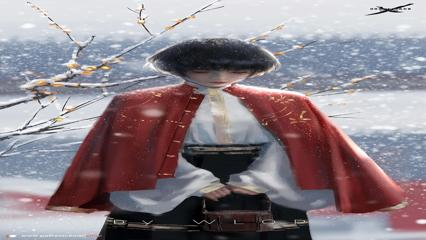

In [11]:
train_images_arr[0]

array([[[ 36,  34,  39],
        [ 46,  42,  43],
        [ 58,  49,  44],
        ...,
        [ 11,   7,   8],
        [ 10,   6,   5],
        [  6,   2,   1]],

       [[ 37,  35,  40],
        [ 50,  46,  47],
        [ 66,  57,  52],
        ...,
        [ 28,  24,  25],
        [ 17,  13,  14],
        [ 12,   8,   7]],

       [[ 40,  40,  42],
        [ 55,  51,  50],
        [ 73,  64,  59],
        ...,
        [ 37,  35,  36],
        [ 24,  22,  23],
        [ 18,  16,  17]],

       ...,

       [[ 59,  44,  37],
        [ 68,  55,  47],
        [ 79,  66,  58],
        ...,
        [197, 179, 143],
        [165, 146, 113],
        [134, 115,  82]],

       [[ 52,  35,  27],
        [ 59,  45,  36],
        [ 70,  56,  47],
        ...,
        [163, 145, 109],
        [140, 121,  89],
        [108,  92,  59]],

       [[ 42,  25,  17],
        [ 51,  34,  26],
        [ 58,  44,  35],
        ...,
        [132, 113,  80],
        [116, 100,  67],
        [ 87,  70,  40]]], dtype=uint8)
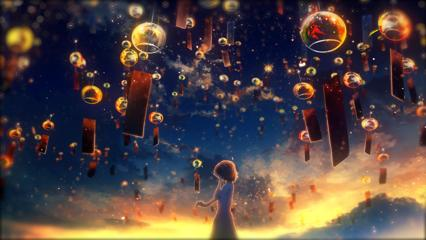

In [12]:
test_images_arr[0]

array([[[30, 28, 33],
        [30, 28, 33],
        [30, 28, 33],
        ...,
        [52, 39, 46],
        [58, 47, 53],
        [58, 47, 53]],

       [[30, 28, 33],
        [30, 28, 33],
        [30, 28, 33],
        ...,
        [57, 44, 51],
        [56, 45, 51],
        [56, 45, 51]],

       [[30, 28, 33],
        [30, 28, 33],
        [30, 28, 33],
        ...,
        [59, 46, 53],
        [55, 44, 50],
        [55, 44, 50]],

       ...,

       [[39, 31, 29],
        [24, 19, 16],
        [28, 20, 18],
        ...,
        [43, 43, 55],
        [58, 58, 70],
        [52, 52, 64]],

       [[28, 23, 20],
        [13,  9,  6],
        [ 9,  4,  1],
        ...,
        [46, 46, 58],
        [58, 58, 70],
        [52, 52, 64]],

       [[25, 21, 18],
        [30, 26, 23],
        [31, 27, 24],
        ...,
        [60, 60, 72],
        [58, 58, 70],
        [52, 52, 64]]], dtype=uint8)
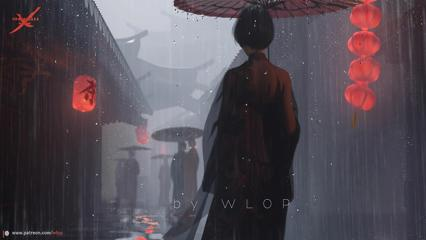

In [13]:
val_images_arr[0]

#Model Implementation

In [15]:
import tensorflow as tf
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.applications import ResNet50
from keras.preprocessing.image import load_img, img_to_array

In [16]:
vgg19 = VGG19(weights='imagenet', include_top=False)
resnet50 = ResNet50(weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 5s 0us/step


In [38]:
def preprocess_image(image_array):
    image_array = tf.image.resize(image_array, (240, 426))
    image_array = preprocess_input(image_array)
    return image_array

In [29]:
def get_embeddings(model, image_array):
    return model.predict(preprocess_image(image_array))

In [39]:
# input_image_array = train_images_arr[0]  # Replace with your specific image
input_image_array = preprocess_image(test_images_arr)
vgg_embedding = get_embeddings(vgg19, input_image_array)
resnet_embedding = get_embeddings(resnet50, input_image_array)

4/4 [==============================] - 1s 163ms/step


In [40]:
import cv2
import numpy as np

# Load your dataset images (train_images_arr)
# Compute feature embeddings (e.g., histograms) for each image

def compute_similarity(embedding1, embedding2):
    # Compute similarity score (e.g., using Euclidean distance)
    return np.linalg.norm(embedding1 - embedding2)

def find_similar_images(input_image, dataset_images, num_similar=5):
    input_embedding = vgg_embedding(input_image)  # Replace with your feature extraction method
    similarity_scores = []

    for dataset_image in dataset_images:
        dataset_embedding = vgg_embedding(dataset_image)  # Replace with your feature extraction method
        similarity = compute_similarity(input_embedding, dataset_embedding)
        similarity_scores.append(similarity)

    # Sort dataset images by similarity score
    sorted_indices = np.argsort(similarity_scores)
    top_similar_indices = sorted_indices[:num_similar]

    return top_similar_indices, similarity_scores

# Example usage
input_image = val_images_arr[0]  # Replace with your input image
similar_indices, similarity_scores = find_similar_images(input_image, train_images_arr)

print("Top 5 similar images:")
for i, idx in enumerate(similar_indices):
    print(f"Image {idx}: Similarity Score = {similarity_scores[idx]:.4f}")


TypeError: 'numpy.ndarray' object is not callable

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, UpSampling2D

In [ ]:
encoder_decoder_model = encoder_decoder_model()
encoder_decoder_model.summary()
print("\n")
# tf.keras.utils.plot_model(model, to_file='/content/drive/My Drive/model.png')

In [ ]:
from keras.applications import VGG19, ResNet50
from keras.models import Model

vgg19_base = VGG19(weights='imagenet', include_top=False)
resnet50_base = ResNet50(weights='imagenet', include_top=False)

In [ ]:
features = resnet50_base.predict(train_data_ws)

In [ ]:
def extract_features(model, preprocess_function, image):
    # Preprocess the image for the specific model
    image = preprocess_function(image)
    features = model.predict(image.reshape(1, *image.shape))
    return features.flatten()

In [ ]:
def concatenate_features(models, preprocess_functions, images):
    concatenated_features = []
    for image in images:
        # Extract and concatenate features from all models for each image
        features_list = [extract_features(m, p, image) for m, p in zip(models, preprocess_functions)]
        concatenated_features.append(np.concatenate(features_list))
    return np.array(concatenated_features)

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.image import resize

def custom_preprocess(image, target_size=(240, 426)):
    # Resize the image to the target size
    image = resize(image, target_size)

    # Convert the image to a numpy array
    image = img_to_array(image)

    # Normalize the pixel values to the range [0, 1]
    image = image / 255.0

    return image

In [ ]:
preprocessed_images = [custom_preprocess(image) for image in train_images_arr]

In [ ]:
from tensorflow.keras.applications.vgg19 import preprocess_input as vgg19_preprocess
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess

In [ ]:
models = [vgg19_base, resnet50_base]
preprocess_functions = [vgg19_preprocess, resnet_preprocess]  # Define custom_preprocess for your CNN
image_feature_vectors = concatenate_features(models, preprocess_functions, train_images_arr)

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have image_feature_vectors (shape: [n_samples, n_features])

# Choose the number of clusters (K)
n_clusters = 9  # You can adjust this

# Initialize K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(image_feature_vectors)

# Get cluster labels
cluster_labels = kmeans.labels_

# Visualize the clusters (you can adapt this based on your feature dimensions)
plt.scatter(image_feature_vectors[:, 0], image_feature_vectors[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Assuming you have a new image feature vector (new_image_feature_vector)

# Initialize KNN
knn = NearestNeighbors(n_neighbors=5)  # You can adjust the number of neighbors (K)
knn.fit(image_feature_vectors)

# Find K nearest neighbors for the new image
distances, indices = knn.kneighbors([new_image_feature_vector])

# Assess similarity based on the labels of the neighbors (if available)
# For example, if you have labeled data, you can use the majority class of the neighbors
# Alternatively, you can use the average of the target values (if regression task)

# Example: If you have labels for the image_feature_vectors
neighbor_labels = labels[indices[0]]
similarity_score = np.mean(neighbor_labels)  # Adjust this based on your problem

print(f"Similarity score: {similarity_score:.2f}")